In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [4]:
np.random.seed(42)

data = pd.DataFrame({
    "time": np.arange(0, 500),
    "altitude": np.random.normal(50000, 2000, 500),
    "velocity": np.random.normal(1500, 100, 500),
    "temperature": np.random.normal(900, 50, 500),
    "vibration": np.random.normal(3, 0.5, 500)
})

data.to_csv("../data/rlv_telemetry.csv", index=False)
data.head()

,time,altitude,velocity,temperature,vibration
0,0,50993.428306,1592.617755,969.967772,3.389181
1,1,49723.471398,1690.941664,946.231684,2.724407
2,2,51295.377076,1360.143243,902.981518,2.590901
3,3,53046.059713,1556.296924,867.653161,2.998313
4,4,49531.693251,1434.935743,934.911166,2.914908


In [5]:
df = pd.read_csv("../data/rlv_telemetry.csv")
df.describe()

,time,altitude,velocity,temperature,vibration
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,50013.675989,1503.182612,905.424226,3.016594
std,144.481833,1962.506495,97.799720,50.512317,0.492033
min,0.000000,43517.465320,1230.311336,755.187231,1.529806
25%,124.750000,48599.385191,1440.470826,869.878519,2.694032
50%,249.500000,50025.594293,1502.853160,905.990292,2.995543
75%,374.250000,51273.566508,1565.124230,937.736918,3.349885
max,499.000000,57705.462981,1763.238206,1030.084156,4.596554


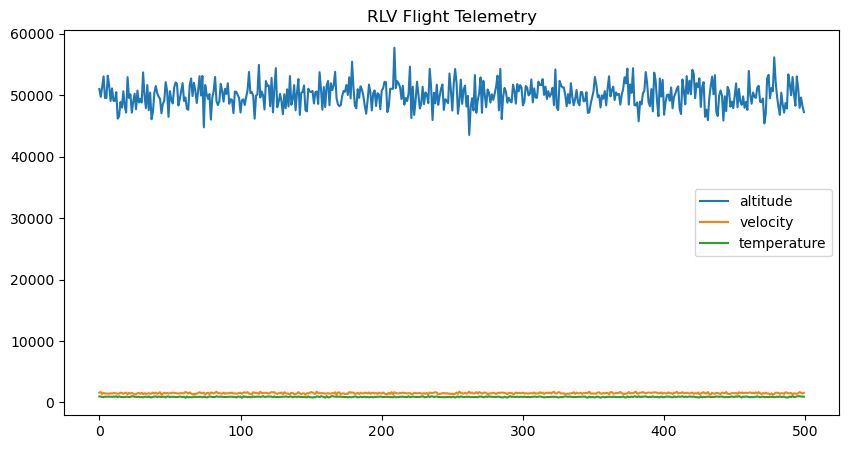

In [6]:
df[["altitude", "velocity", "temperature"]].plot(figsize=(10,5))
plt.title("RLV Flight Telemetry")
plt.show()

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop("time", axis=1))

In [8]:
model = IsolationForest(contamination=0.05, random_state=42)
df["anomaly"] = model.fit_predict(scaled_data)

df["anomaly"].value_counts()

anomaly
 1    475
-1     25
Name: count, dtype: int64

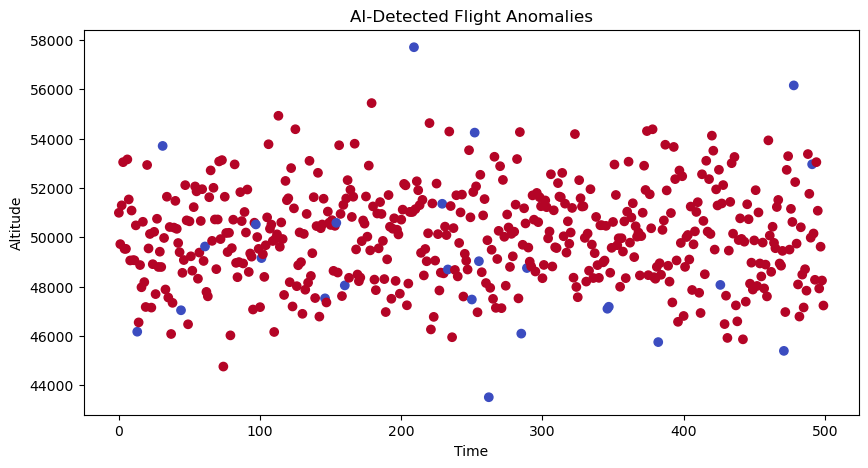

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(df["time"], df["altitude"], c=df["anomaly"], cmap="coolwarm")
plt.xlabel("Time")
plt.ylabel("Altitude")
plt.title("AI-Detected Flight Anomalies")
plt.show()

In [10]:
anomaly_rate = (df["anomaly"] == -1).sum() / len(df)

if anomaly_rate < 0.03:
    decision = "Vehicle Safe for Reuse"
else:
    decision = "Further Inspection Required"

decision

'Further Inspection Required'

In [2]:
import os
import pandas as pd

# Create data folder permanently
os.makedirs("data", exist_ok=True)

# CREATE DATAFRAME (Permanent Fix)
data = {
    "altitude": [50000+i*10 for i in range(100)],
    "velocity": [7500+i*5 for i in range(100)],
    "temperature": [300+(i%10) for i in range(100)],
}

df = pd.DataFrame(data)

# Simple anomaly detection
df["anomaly"] = 0
df.loc[df["temperature"] > 307, "anomaly"] = -1

# Save file permanently
df.to_csv("data/rlv_telemetry.csv", index=False)

print("✅ Telemetry saved successfully")

✅ Telemetry saved successfully
